## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "explore_hiroshima"
hashtag = "じゃけぇ広島に恋しとる" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
#tau, snapshots = tb.get_snapshots_closed_intervals(df, 'minutes=30')
tau, snapshots = tb.get_snapshots_closed_intervals(df, 'hours=1')
print(f"tau = {tau}")

tau = 235


In [4]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/explore_hiroshima/original/じゃけぇ広島に恋しとる_21-29_235_aam


In [5]:
tb.check_degree(G)

singleton:[]


,degree
じゃけぇ広島に恋しとる,2344
ミタイケンひろしま,1256
ひろしまにあ,1212
好きじゃけぇ広島,1157
ええじゃろ広島,1100
...,...
ハンバーグ,5
serakogenfarm,5
今田農園の里芋,4
TCR,4


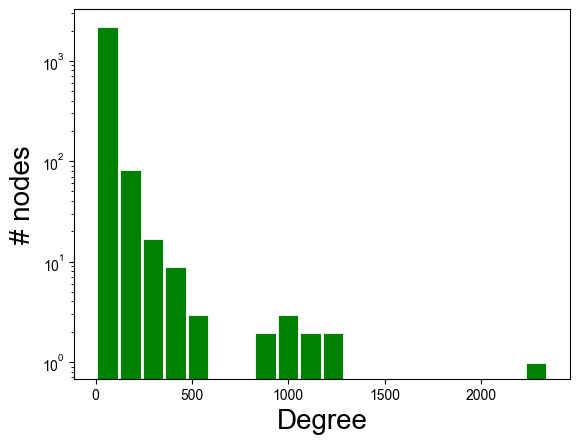

In [10]:
tb.plot_dd(G, 20)

In [6]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.6056477551770874, 
its standard error sigma: 0.10541593958076223, 
k_min: 107.0


(2.6056477551770874, 0.10541593958076223, 107.0)

In [7]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 1.1282564451966064e-06.


In [8]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.20745978011007682.


C:\Users\yuki\Desktop\github\Instagram-Trend-Analysis\.venv\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5959930524293826, 
its standard error sigma: 0.06849061748869814, 
k_min: 46.0


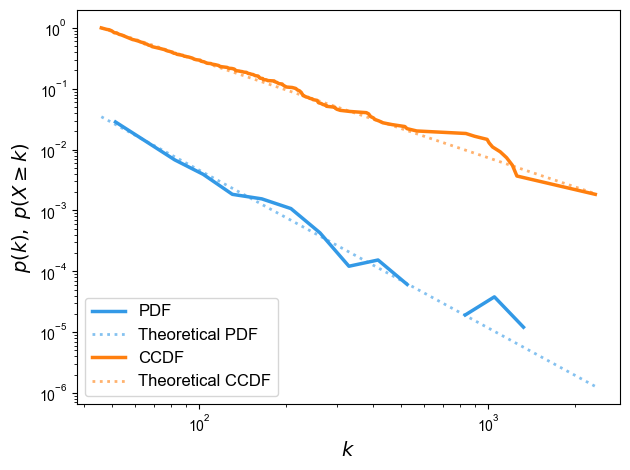

In [9]:
tb.plot_pdf_ccdf(G)